In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')
from calendar import monthrange

In [82]:
def AEMET_Pdiaria(estacion, provincia):
    """
    Parámetros:
    -----------
    estacion:  string. Código de la estación
    provinvia: string. Provincia a la que pertenece la estación. Define el archivo csv donde acceder a los datos, por lo que debe replicar 
                       el nombre del archivo, es decir, primera letra en mayúsucula y sin ninguna tilde.
                       
    Salidas:
    --------
    serie:     pd.Series. Serie diaria de precipitación en mm
    atributos: pd.Series. Atributos de la estación: coordenadas, altitud...
    """

    # cargar datos burtos de la provincia
    ruta = 'G:/CLIMA/02_HYDRO-CLIMATE/AEMET/precipitacion/diario/'
    raw = pd.read_csv(ruta + provincia + '.csv', sep=';', encoding='latin1')
    # extraer datos de la estación
    data = raw.loc[raw.INDICATIVO == estacion,:]
    
    # ATRIBUTOS
    # .........
    atributos = data[['NOMBRE', 'ALTITUD', 'NOM_PROV', 'LONGITUD', 'LATITUD', 'DATUM']].iloc[0]
    
    # SERIE DIARIA
    # ...........
    # fechas de la serie
    start = pd.datetime(data.AÑO.iloc[0], data.MES.iloc[0], 1).date()
    year, month = data.AÑO.iloc[-1], data.MES.iloc[-1]
    end = pd.datetime(year, month, monthrange(year, month)[1]).date()
    fechas = pd.date_range(start, end)
    # ordenar datos en una serie
    serie = pd.Series(index=fechas)
    cols = ['P' + str(i) for i in np.arange(1, 32)]
    for idx in data.index:
        year, month = data.loc[idx, ['AÑO', 'MES']]
        days = monthrange(year, month)[1]
        d = pd.date_range(pd.datetime(year, month, 1), pd.datetime(year, month, days))
        serie[d] = data.loc[idx, cols[:days]]
    # corregir serie
    serie[serie == -3] = 0
    serie[serie == -4] = np.nan
    serie /= 10
        
    return serie, atributos

In [83]:
serie, atributos = AEMET_Pdiaria('1249I', 'Asturias')

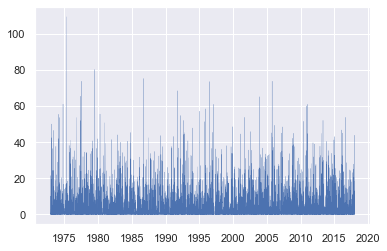

In [85]:
plt.plot(serie, lw=.2)

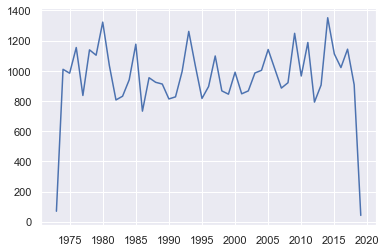

In [86]:
serie_a = serie.resample('y').sum()
plt.plot(serie_a)

In [88]:
serie.mean() * 365.25

991.5914486463431